In [1]:
import numpy as np
import pandas as pd
# Creamos las categorias
sexo=['M','F','Otro']
estatura= ['<150cm','150-170cm','170-190cm','>190cm']
cabello=['Corto','Mediano (hasta orejas)','Largo (supera hombros)']
color=['Rojo','Rubio','Castaño','Negro','Otro']
delineador=['Si','No']

In [51]:
# Creacion de datos artificiales
v_sexo=np.random.choice(sexo, 1000)
v_estatura=np.random.choice(estatura, 1000)
v_cabello=np.random.choice(cabello, 1000)
v_color=np.random.choice(color, 1000)
#v_delineador=np.random.choice(delineador, 100)

In [65]:
# Creacion del dataframe
df=pd.DataFrame()
df['Sexo']=v_sexo 
df['Estatura']=v_estatura
df['Cabello']=v_cabello
df['Color']=v_color
df['Delineador'] = np.where(((df['Sexo']=='F') & ((df['Estatura'] == '<150cm')|(df['Estatura'] == '150-170cm'))) | 
                            ((df['Sexo']=='M') & ((df['Estatura'] == '150-170cm')|(df['Estatura'] == '>190cm'))), 
                            'Si', 'No')

df.head()

,Sexo,Estatura,Cabello,Color,Delineador
0,Otro,150-170cm,Corto,Rojo,No
1,M,>190cm,Largo (supera hombros),Otro,Si
2,Otro,170-190cm,Largo (supera hombros),Negro,No
3,Otro,>190cm,Largo (supera hombros),Rojo,No
4,Otro,>190cm,Corto,Rojo,No


In [66]:
df.Delineador.value_counts()

No    677
Si    323
Name: Delineador, dtype: int64

In [67]:
# Split en train y test 
X= df.drop(columns='Delineador')
y= df['Delineador']
#from sklearn.preprocessing import OneHotEncoder
X_new=pd.get_dummies(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [68]:
# Entrenar el arbol
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [69]:
y_train.unique()

array(['No', 'Si'], dtype=object)

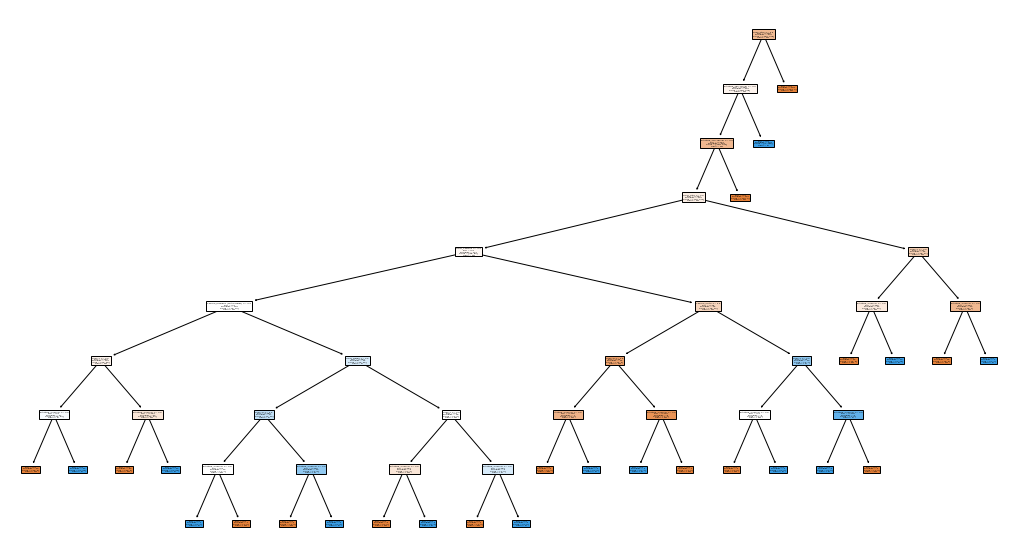

In [70]:
# Graficando
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

In [71]:
y_pred= clf.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       215
          Si       1.00      1.00      1.00       115

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>